In [2]:
%run -i 'functions.py'
%run -i 'encode_csv.py'

Using TensorFlow backend.


In [3]:
covtype = pd.read_csv('../datasets/covtype.data')

In [4]:
len(covtype)

581011

In [14]:
covtype.head()

,2596,51,3,258,0,510,221,232,148,6279,...,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,5
0,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
1,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
2,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
3,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
4,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2


In [27]:
# check if the first one is an ID column. It is not.
len(np.unique(covtype.iloc[:,0]))

1978

In [15]:
covtype.columns

Index(['2596', '51', '3', '258', '0', '510', '221', '232', '148', '6279', '1',
       '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '0.10',
       '0.11', '0.12', '0.13', '0.14', '0.15', '0.16', '0.17', '0.18', '0.19',
       '0.20', '0.21', '0.22', '0.23', '0.24', '0.25', '0.26', '0.27', '0.28',
       '0.29', '0.30', '0.31', '1.1', '0.32', '0.33', '0.34', '0.35', '0.36',
       '0.37', '0.38', '0.39', '0.40', '0.41', '0.42', '5'],
      dtype='object')

In [16]:
print('Classifications: from ', min(covtype['5']), 'to ', max(covtype['5']))

Classifications: from  1 to  7


In [4]:
X = covtype.drop(['5'], axis=1) 
le = LabelEncoder().fit(covtype['5']) 
y = le.transform(covtype['5'])

# encode data
encoded, encoders = number_encode_features(X)

# scale columns between -1 and 1
X = scale_columns(X)

X.head()

,2596,51,3,258,0,510,221,232,148,6279,...,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42
0,-0.184775,-0.276825,-0.183390,-0.041108,-0.067725,-0.275418,0.030921,0.045989,0.033353,0.591763,...,-0.044175,-0.090392,-0.077716,-0.002773,-0.003255,-0.000205,-0.000513,-0.026803,-0.023762,-0.01506
1,-0.077722,-0.046269,-0.077329,-0.001022,0.024007,0.116601,0.086039,0.057800,-0.029639,0.577264,...,-0.044175,-0.090392,-0.077716,-0.002773,-0.003255,-0.000205,-0.000513,-0.026803,-0.023762,-0.01506
2,-0.087227,-0.001825,0.059035,-0.019634,0.092482,0.103955,0.101787,0.057800,-0.080820,0.589811,...,-0.044175,-0.090392,-0.077716,-0.002773,-0.003255,-0.000205,-0.000513,-0.026803,-0.023762,-0.01506
3,-0.182274,-0.307381,-0.183390,-0.083342,-0.061265,-0.275277,0.030921,0.042052,0.029416,0.584374,...,-0.044175,-0.090392,-0.077716,-0.002773,-0.003255,-0.000205,-0.000513,-0.026803,-0.023762,-0.01506
4,-0.190278,-0.065714,-0.122784,0.021884,-0.079353,-0.320802,0.070291,0.053863,-0.009954,0.564717,...,-0.044175,-0.090392,-0.077716,-0.002773,-0.003255,-0.000205,-0.000513,-0.026803,-0.023762,-0.01506


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
print("train:", len(X_train), ", test:", len(X_test))

# taking a subset

n = 5000 
X_train = X_train[:n]
y_train = y_train[:n]
X_test = X_test[:n//10]
y_test = y_test[:n//10]

print("train:", len(X_train), ", test:", len(X_test))

train: 464808 , test: 116203
train: 5000 , test: 500



using gamma= 0.01

nystroem svm fitting

 30 / 300 samples

 60 / 300 samples

 90 / 300 samples

 120 / 300 samples

 150 / 300 samples

 180 / 300 samples

 210 / 300 samples

 240 / 300 samples

 270 / 300 samples

 300 / 300 samples

fourier svm fitting

 30 / 300 samples

 60 / 300 samples

 90 / 300 samples

 120 / 300 samples

 150 / 300 samples

 180 / 300 samples

 210 / 300 samples

 240 / 300 samples

 270 / 300 samples

 300 / 300 samples

kernel svm fitting

linear svm fitting


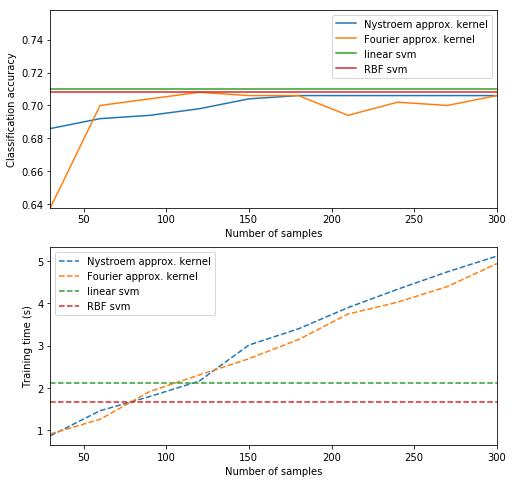

In [48]:
covtype_fit = fit_all(X_train, y_train, X_test, y_test)
plot_results(covtype_fit)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
print("train:", len(X_train), ", test:", len(X_test))

# taking a subset

n = 8000 
X_train = X_train[:n]
y_train = y_train[:n]
X_test = X_test[:n//10]
y_test = y_test[:n//10]

print("train:", len(X_train), ", test:", len(X_test))

train: 464808 , test: 116203
train: 8000 , test: 800



using gamma= 0.01

nystroem svm fitting

 30 / 300 samples

 60 / 300 samples

 90 / 300 samples

 120 / 300 samples

 150 / 300 samples

 180 / 300 samples

 210 / 300 samples

 240 / 300 samples

 270 / 300 samples

 300 / 300 samples

fourier svm fitting

 30 / 300 samples

 60 / 300 samples

 90 / 300 samples

 120 / 300 samples

 150 / 300 samples

 180 / 300 samples

 210 / 300 samples

 240 / 300 samples

 270 / 300 samples

 300 / 300 samples

kernel svm fitting

linear svm fitting


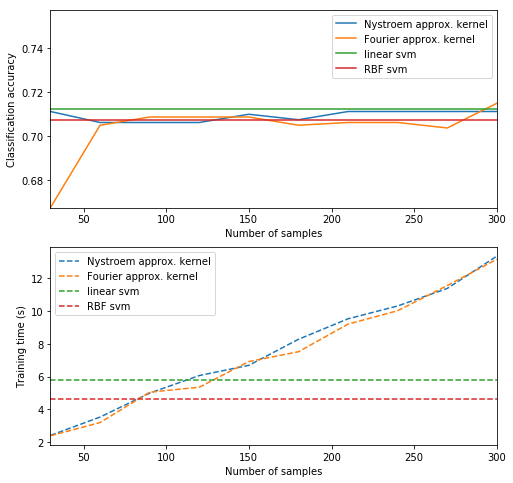

In [50]:
covtype_fit = fit_all(X_train, y_train, X_test, y_test)
plot_results(covtype_fit)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
print("train:", len(X_train), ", test:", len(X_test))

# taking a subset

n = 12000 
X_train = X_train[:n]
y_train = y_train[:n]
X_test = X_test[:n//10]
y_test = y_test[:n//10]

print("train:", len(X_train), ", test:", len(X_test))

train: 464808 , test: 116203
train: 12000 , test: 1200


In [ ]:
covtype_fit = fit_all(X_train, y_train, X_test, y_test, scale_samples=10)
plot_results(covtype_fit)
# già salvato

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
print("train:", len(X_train), ", test:", len(X_test))

# taking a subset

n = 16000 
X_train = X_train[:n]
y_train = y_train[:n]
X_test = X_test[:n//10]
y_test = y_test[:n//10]

print("train:", len(X_train), ", test:", len(X_test))

train: 464808 , test: 116203
train: 16000 , test: 1600



using gamma= 0.01

nystroem svm fitting

 11 / 88 samples

 22 / 88 samples

 33 / 88 samples

 44 / 88 samples

 55 / 88 samples

 66 / 88 samples

 77 / 88 samples

 88 / 88 samples

fourier svm fitting

 11 / 88 samples

 22 / 88 samples

 33 / 88 samples

 44 / 88 samples

 55 / 88 samples

 66 / 88 samples

 77 / 88 samples

 88 / 88 samples

kernel svm fitting

linear svm fitting


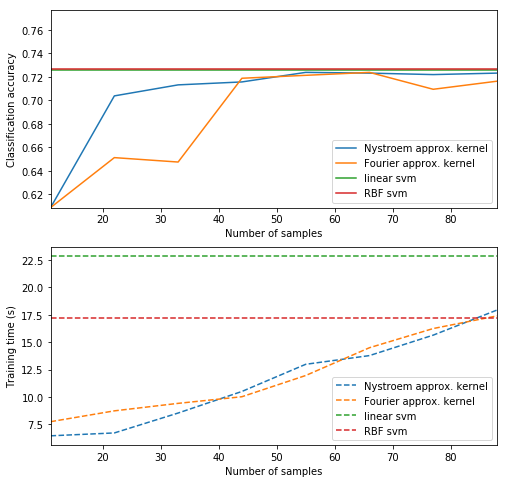

In [12]:
covtype_fit = fit_all(X_train, y_train, X_test, y_test, scale_samples=11)
plot_results(covtype_fit)

### Mandare Job su galileo

In [ ]:
job_results = pickle.load(open('pickle/covtype.pickle','rb'))
plot_results(job_results)

### Provare anche regressione